In [2]:
import torch.optim as optim
import torch
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [38]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [39]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [40]:
t_un = 0.1 * t_u

In [41]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_ind = torch.randperm(n_samples)

train_ind = shuffled_ind[:-n_val]
val_ind = shuffled_ind[-n_val:]

train_ind, val_ind

(tensor([ 7,  0,  8,  2,  5,  9, 10,  3,  6]), tensor([4, 1]))

In [42]:
train_t_c = t_c[train_ind]
train_t_u = t_u[train_ind]

val_t_c = t_c[val_ind]
val_t_u = t_u[val_ind]

In [43]:
def train_loop(n_epochs, optimizer, params, train_t_c, train_t_u, val_t_c, val_t_u):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        loss_train_t_p = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            loss_val_t_p = loss_fn(val_t_p, val_t_c)
            assert loss_val_t_p.requires_grad == False
        
        optimizer.zero_grad()
        loss_train_t_p.backward()
        optimizer.step()

        if epoch <= 5 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Train loss {loss_train_t_p.item():.4f}, Val loss {loss_val_t_p.item():.4f}")

    return params


In [44]:
learning_rate = 1e-3
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=learning_rate)

In [45]:
train_loop(
    n_epochs=15000,
    optimizer=optimizer,
    params=params,
    train_t_c=train_t_c,
    train_t_u=train_t_u,
    val_t_c=val_t_c,
    val_t_u=val_t_u
)

Epoch 1, Train loss 12048887.0000, Val loss 10182106.0000
Epoch 2, Train loss 12024701.0000, Val loss 10161666.0000
Epoch 3, Train loss 12000542.0000, Val loss 10141248.0000
Epoch 4, Train loss 11976406.0000, Val loss 10120851.0000
Epoch 5, Train loss 11952296.0000, Val loss 10100475.0000
Epoch 500, Train loss 3774549.2500, Val loss 3189377.5000
Epoch 1000, Train loss 791102.1250, Val loss 668248.1875
Epoch 1500, Train loss 92638.0625, Val loss 78163.0781
Epoch 2000, Train loss 4931.4619, Val loss 4134.5088
Epoch 2500, Train loss 101.4798, Val loss 78.2860
Epoch 3000, Train loss 7.4004, Val loss 2.7097
Epoch 3500, Train loss 6.8856, Val loss 2.5960
Epoch 4000, Train loss 6.8542, Val loss 2.6080
Epoch 4500, Train loss 6.8148, Val loss 2.6118
Epoch 5000, Train loss 6.7647, Val loss 2.6166
Epoch 5500, Train loss 6.7012, Val loss 2.6230
Epoch 6000, Train loss 6.6213, Val loss 2.6314
Epoch 6500, Train loss 6.5214, Val loss 2.6425
Epoch 7000, Train loss 6.3973, Val loss 2.6573
Epoch 7500, Tr

tensor([ 0.0061, -0.1190, -1.5395], requires_grad=True)

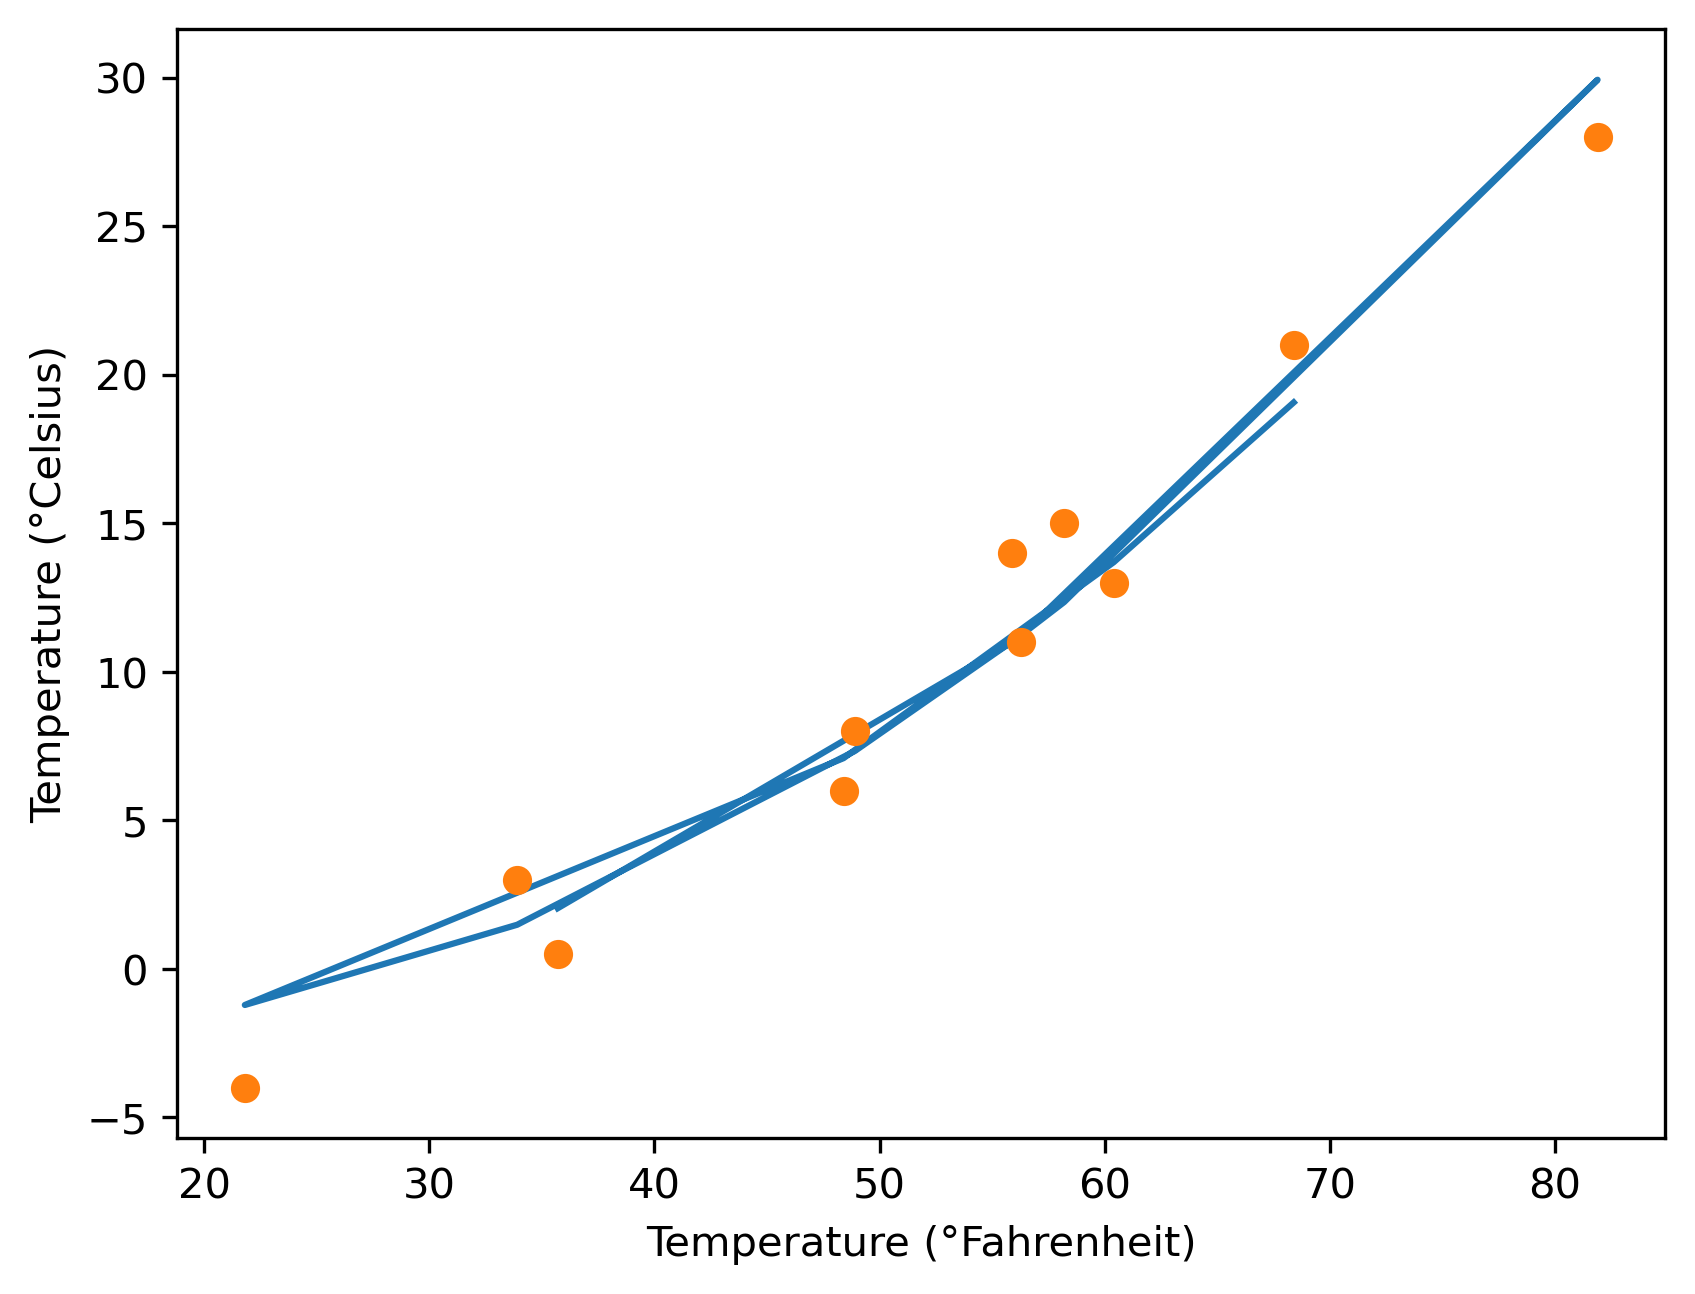

In [ ]:
t_p = model(t_u, *params)  # <1>

fig = plt.figure(dpi=300)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip